In [1]:
import pylab as plt
import numpy as np
from astropy.io import fits
import matplotlib as mpl
import math
import astropy.io.fits as fits
from astropy.table import Table 

In [4]:
df = Table(fits.getdata('LMC_EDR3_wo_cuts_5.fits')) # import eDR3 data (ra:110 to 55, dec:-80 to -55)

Text(0.5, 1.0, 'Proper Motion All Stars')

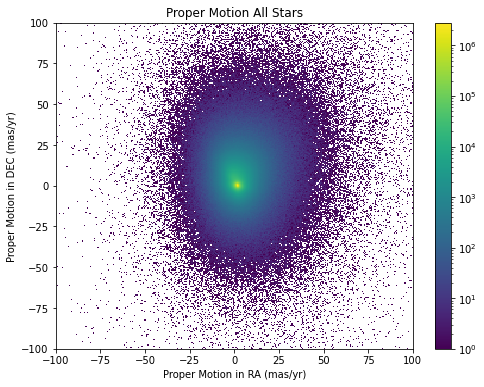

In [30]:
# Plot the proper motion of all stars in the imported area
fig = plt.figure(figsize=(8,6))
plt.hist2d(df['pmra'], df['pmdec'], (300,300), norm=mpl.colors.LogNorm(),range=([-100,100],[-100,100]))
plt.colorbar()
plt.xlabel('Proper Motion in RA (mas/yr)')
plt.ylabel('Proper Motion in DEC (mas/yr)')
plt.title('Proper Motion All Stars')


In [8]:
medpmra = np.nanmedian(df['pmra']) # calculate the median pm in ra
medpmdec = np.nanmedian(df['pmdec']) # calculate the median pm in dec

# calculate the pm distance from the median pm for each point
pmdist = np.sqrt((df['pmra']-medpmra)**2 + (df['pmdec']-medpmdec)**2) 

In [10]:
pmcut = np.where(pmdist > 2.0) # remove all sources within 2 mas/yr of the median pm 
# this removes the sources used in the LMC analysis

In [11]:
mw = df[pmcut] # create table for MW foreground stars and apply pm cut above

Text(0, 0.5, 'Proper Motion in DEC (mas/yr)')

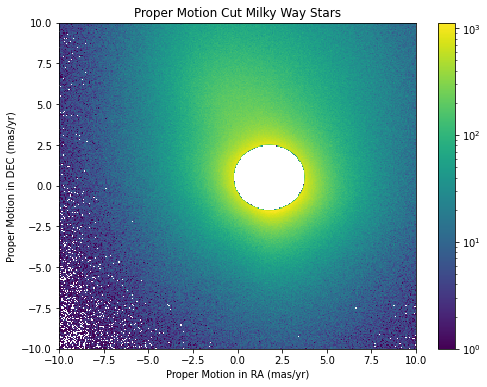

In [31]:
# plot the pm of the pm cut Milky Way stars
fig = plt.figure(figsize=(8,6))
plt.hist2d(mw['pmra'], mw['pmdec'], (300,300), norm=mpl.colors.LogNorm(),range=([-10,10],[-10,10]))
plt.colorbar()
plt.title('Proper Motion Cut Milky Way Stars')
plt.xlabel('Proper Motion in RA (mas/yr)')
plt.ylabel('Proper Motion in DEC (mas/yr)')


Text(0.5, 1.0, 'Proper Motion Cut Milky Way Parallax [mas]')

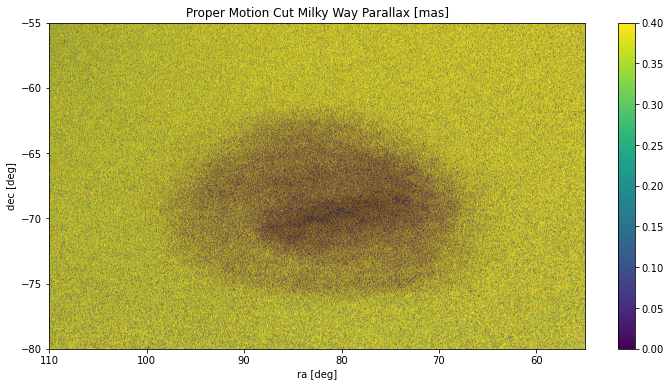

In [23]:
# Plot the Parallax of the pm cut MW stars
plt.figure(figsize=(12,6))
plt.scatter(mw['ra'], mw['dec'], c=mw['parallax'], s=0.01, vmin=0, vmax=0.4)
plt.colorbar()
plt.xlim([110,55])
plt.ylim([-80,-55])
plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')
plt.title('Proper Motion Cut Milky Way Parallax [mas]')


(22.0, 5.0)

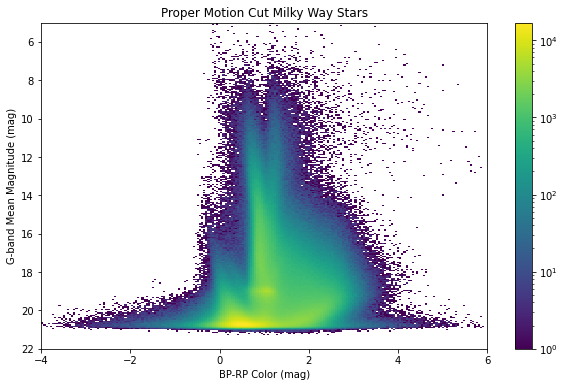

In [22]:
# plot CMD of the pm cut MW stars
fig = plt.figure(figsize=(10,6))
plt.hist2d(mw['bp_rp'], mw['phot_g_mean_mag'], (300,300), norm=mpl.colors.LogNorm())
plt.colorbar()
plt.title('Proper Motion Cut Milky Way Stars')
plt.xlabel('BP-RP Color (mag)')
plt.ylabel('G-band Mean Magnitude (mag)')
plt.xlim(-4,6)
plt.ylim(22,5)